# Visualizing Naive Bayes Features for Tweet Sentiment Analysis

This notebook demonstrates how to visualize Naive Bayes features and confidence ellipses for tweet sentiment analysis. It is part of my learning journey for the DeepLearning.AI NLP Specialization and is intended as a clear, well-documented resource for others following a similar path.

---

**Sections:**
1. Import Required Libraries and Utility Functions
2. Load and Inspect the Bayes Features Dataset
3. Visualize Tweet Features by Sentiment
4. Plot Confidence Ellipses for Naive Bayes Features
5. Modify Features to Simulate Overlapping Distributions
6. Visualize Modified Distributions and Confidence Ellipses


## 1. Import Required Libraries and Utility Functions

We import numpy, pandas, matplotlib, and the `confidence_ellipse` utility function. These are essential for data analysis and visualization in this notebook.

In [1]:
import numpy as np  # Library for linear algebra and math utils
import pandas as pd  # Dataframe library
import matplotlib.pyplot as plt  # Library for plots

# Function to add confidence ellipses to charts+
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    facecolor : str
        The facecolor of the ellipse.
    **kwargs : dict
        Additional arguments for matplotlib.patches.Ellipse.
    """
    import numpy as np
    from matplotlib.patches import Ellipse

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Eigenvalues and eigenvectors
    vals, vecs = np.linalg.eigh(cov)
    # Sort eigenvalues and eigenvectors
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # Calculate angle
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * n_std * np.sqrt(vals)
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=theta, facecolor=facecolor, **kwargs)

    ax.add_patch(ellipse)
    return ellipse

## 2. Load and Inspect the Bayes Features Dataset

We load the Naive Bayes features for each tweet from `bayes_features.csv` into a pandas DataFrame and display the first few rows to understand the structure of the data.

In [4]:
# Load the data from the csv file
# Each row represents a tweet with its positive, negative log-likelihoods and sentiment label

data = pd.read_csv('../data/bayes_features.csv')
data.head(5)  # Print the first 5 tweets features

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


## 3. Visualize Tweet Features by Sentiment

We create a scatter plot of the positive and negative log-likelihood features, colored by sentiment, to visually inspect the separation between positive and negative tweets.

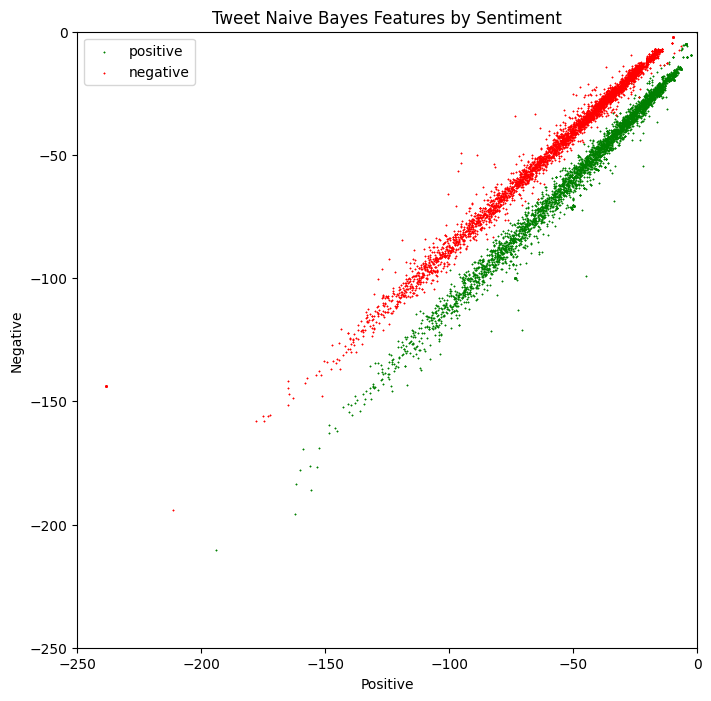

In [5]:
# Scatter plot of positive vs negative log-likelihoods, colored by sentiment
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'green']
sentiments = ['negative', 'positive']
index = data.index

for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

ax.legend(loc='best')
plt.xlim(-250, 0)
plt.ylim(-250, 0)
plt.xlabel("Positive")
plt.ylabel("Negative")
plt.title("Tweet Naive Bayes Features by Sentiment")
plt.show()

## 4. Plot Confidence Ellipses for Naive Bayes Features

We overlay confidence ellipses (2σ and 3σ) for each sentiment class on the scatter plot. This summarizes the distribution and variance of the features for positive and negative tweets.

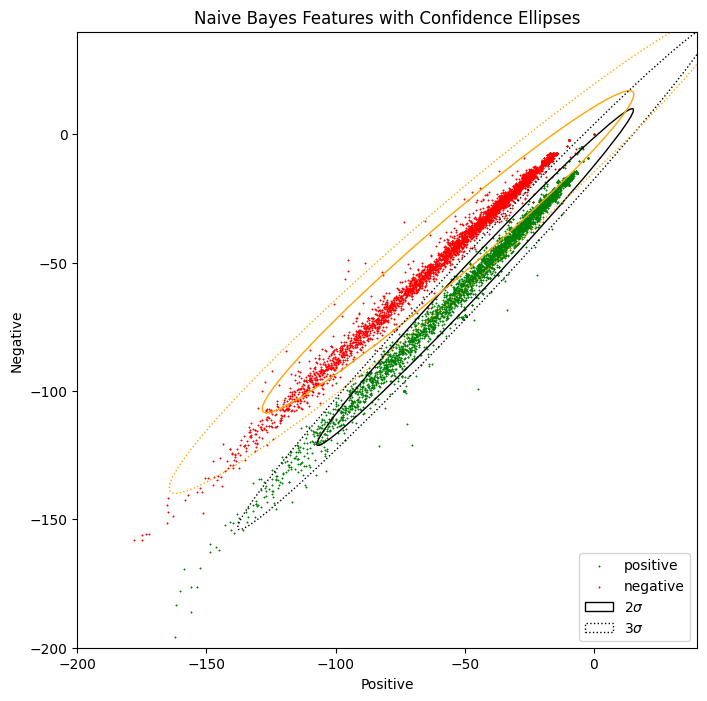

In [6]:
# Plot with confidence ellipses (2σ and 3σ) for each sentiment class
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'green']
sentiments = ['negative', 'positive']
index = data.index

for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

plt.xlim(-200, 40)
plt.ylim(-200, 40)
plt.xlabel("Positive")
plt.ylabel("Negative")

# Confidence ellipses
data_pos = data[data.sentiment == 1]
data_neg = data[data.sentiment == 0]
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend(loc='lower right')
plt.title("Naive Bayes Features with Confidence Ellipses")
plt.show()

## 5. Modify Features to Simulate Overlapping Distributions

To understand how overlapping distributions affect Naive Bayes, we modify the features for positive tweets to create more overlap between the classes. This simulates a scenario where the model's accuracy would decrease.

In [7]:
# Create a copy and modify positive sentiment features to increase overlap
data2 = data.copy()
data2.loc[data2.sentiment == 1, 'negative'] = data2.loc[data2.sentiment == 1, 'negative'] * 1.5 + 50
data2.loc[data2.sentiment == 1, 'positive'] = data2.loc[data2.sentiment == 1, 'positive'] / 1.5 - 50

## 6. Visualize Modified Distributions and Confidence Ellipses

We plot the modified features and their confidence ellipses to observe the effect of overlapping distributions on the Naive Bayes model's visual separability.

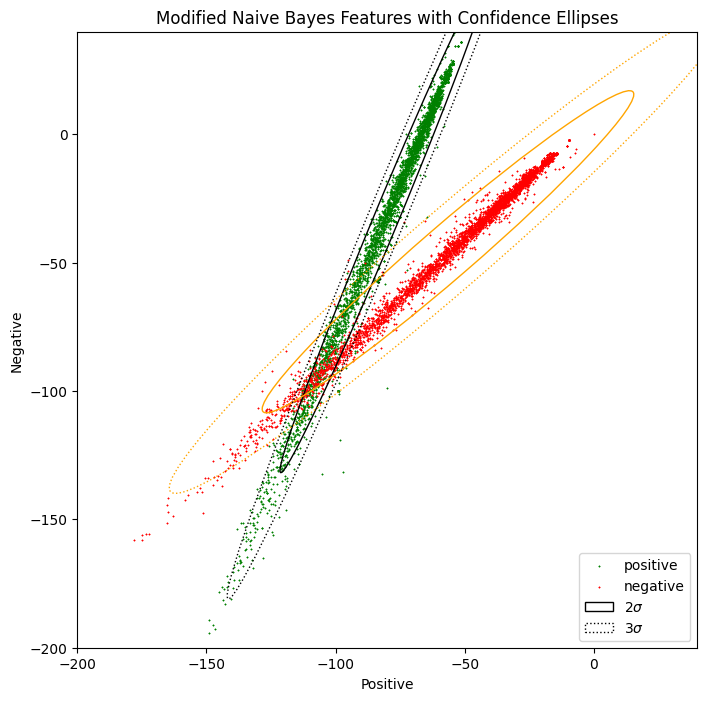

In [8]:
# Plot the modified features and their confidence ellipses
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'green']
sentiments = ['negative', 'positive']
index = data2.index

for sentiment in data2.sentiment.unique():
    ix = index[data2.sentiment == sentiment]
    ax.scatter(data2.iloc[ix].positive, data2.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

plt.xlim(-200, 40)
plt.ylim(-200, 40)
plt.xlabel("Positive")
plt.ylabel("Negative")

data_pos = data2[data2.sentiment == 1]
data_neg = data2[data2.sentiment == 0]
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend(loc='lower right')
plt.title("Modified Naive Bayes Features with Confidence Ellipses")
plt.show()